In [2]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm_notebook
import pandas as pd
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


## Logic Based FizzBuzz Function [Software 1.0]

In [3]:
def fizzbuzz(n):
   
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'
   

## Create Training and Testing Datasets in CSV Format

In [4]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?

    #Inputdata and outputdata are two vectors or array which will contain input data and 
    #output data 
    #and once the fizzbuzz is executed the output is generated. 
    #so that later when dataset is being created (2 columns- one for number and the other one for 
    #label) this data is fed into it.

    inputData   = []  #this will later contain the number 
    outputData  = []  #output data will contain the output i.e.fizz, buzz, fizzbuzz, or other
    
    # Why do we need training Data?

         #Software 1.0 does not need training data to output the correct answers.
         #since for software 2.0 we cannot simply use control statements like if a%3 is 0: print("fizz")or if a%5==0:print("buzz").
         #Instead we first give our program a training data, which should ideally help it learn what input is associated with fizz,
         #buzz, fizzbuzz or other.

    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))  

                                        #This is executing the software 1.0 and is saving the result
                                        #in outputdata[]. which is will late be saved in the label column of
                                        #the dataset.
                                        #this is called two times one for training.csv and other for 
                                        #testing.csv with different start and end parameters.

    # Why Dataframe?

#   dataframe is collection of data that is organised into columns. so for the follwing dataframe there will be two columns 
#    namely input and label(label will determine that in what class or category does the output falls in.)

    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")
    
  

## Processing Input and Label Data

In [5]:
def processData(dataset):
    
    # Why do we have to process?
    '''
    Now since the dataset with the collection of data that is organised into two columns "input" and "label" 
    has been created. The follwing processing basically picks up the data from that dataset and puts the values 
    into variables named data and labels. Furthermore processedData and processedLabel get the encoded version of this data.
    we cannot directly feed in the raw data because then it is possible that the program might find some unwanted
    corelation between the data. 
    '''
    data = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [6]:
import numpy as np

def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        '''
        The training data consists of numbers in the range {101, 1000}. this calculates to 1000-101+1= 900. 
        To represent 900 numbers in binary we need atleast 10 bits(why- because 2**10=1024. why not 2**9 because 
        2**9=512.
        9 places wont be able to represent more than 512 numbers(0-511) . So the follwing function converts each input number
        into a binary consisting 10 places of 1s or 0s.
        '''
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [7]:
def encodeLabel(labels):
    '''
    After I referred to this blog: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f 
    why didnt we use "ONE HOT ENCODING" for categorizing the output i.e. Later i understood that np_utils.to_categorical is doing 
    that job.
       
    '''
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])
            
    return np_utils.to_categorical(np.array(processedLabel),4)
                                         
                                         #   the np_utils.to_categorical() is doing the follwing task i.e. ONE HOT ENCODING :
                                       # if(labelInstance=="fizz"):
                                            #processedLabel.append([0,1,0,0])
                                            #elif(labelInstance=="buzz"):
                                           # processedLabel.append([0,0,1,0])
                                          #  if(labelInstance=="fizzbuzz"):
                                         #   processedLabel.append([0,0,0,1])
                                        #else:
                                        #    processedLabel.append([1,0,0,0]) #number not divisible by either 3 or 5. 
                                        
label={"Fizz","Buzz","FizzBuzz","other"}    


In [8]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


In [9]:
# Read Dataset
trainingData = pd.read_csv('training.csv')
testingData  = pd.read_csv('testing.csv')
'''
this is where training dataset and testing dataset are copied into their respective process 
dataset for use in our model.
'''
# Process Dataset
processedTrainingData, processedTrainingLabel = processData(trainingData)
processedTestingData, processedTestingLabel   = processData(testingData)

## Tensorflow Model Definition

In [10]:
# Defining Placeholder
'''
this is just a placeholder that it doesnt contain any data yet.
'''
inputTensor  = tf.placeholder(tf.float32, [None, 10])
outputTensor = tf.placeholder(tf.float32, [None, 4])

In [20]:

NUM_HIDDEN_NEURONS_LAYER_1 = 100  #this declares number of neurons or nodes in the hidden layer 
LEARNING_RATE = 0.05  
'''                     learning rate is a hyperparameter that 
                        can be varied for changing to the accuracy of the output. by changing this 
                        the efficiency of the model changes(increase or decrease).
'''
# Initializing the weights to Normal Distribution
'''
we are initializing the weights randomly which makes sense becuase in the begining 
we have no idea what weights might work and what might not. 
'''
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.01))

# Initializing the input to hidden layer weights
input_hidden_weights  = init_weights([10, NUM_HIDDEN_NEURONS_LAYER_1]) #initializing the weights from input layer that has
                                                                       #10 nodes to the hidden layer that has 100 nodes
                                                                                    
# Initializing the hidden to output layer weights
hidden_output_weights = init_weights([NUM_HIDDEN_NEURONS_LAYER_1, 4]) #initiating weights from hidden layer with 100 nodes 
                                                                      #to the output layer which has 4 nodes.
                                                                      

# Computing values at the hidden layer
hidden_layer = tf.nn.relu(tf.matmul(inputTensor, input_hidden_weights)) 
'''
    the activation function used at the hidden layer is called relu. relu stands for rectified linear unit.
    what Relu essentially does is that it tranforms any negative value to ZERO and keeps the non-negative values as they are.
'''
# Computing values at the output layer
output_layer = tf.matmul(hidden_layer, hidden_output_weights)

# Defining Error Function
error_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=outputTensor))
'''
    the error function that we are usign the the output layer is the softmax cross entropy 
'''

# Defining Learning Algorithm and Training Parameters
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(error_function)

# Prediction Function
prediction = tf.argmax(output_layer, 1)

# Training the Model

In [24]:
NUM_OF_EPOCHS = 5000   
'''
                        number of EPOCH and BATCH SIZE are also hyperparameters since 
                        they are being set before the training begins and they influence the training accuracy. 
'''
BATCH_SIZE = 128

training_accuracy = []
batch=[]

with tf.Session() as sess:
    
    # Set Global Variables ?
    tf.global_variables_initializer().run()
    
    for epoch in tqdm_notebook(range(NUM_OF_EPOCHS)):
        
        #Shuffle the Training Dataset at each epoch
        p = np.random.permutation(range(len(processedTrainingData)))
        processedTrainingData  = processedTrainingData[p]
        processedTrainingLabel = processedTrainingLabel[p]
        
        # Start batch training
        for start in range(0, len(processedTrainingData), BATCH_SIZE):
            end = start + BATCH_SIZE
            sess.run(training, feed_dict={inputTensor: processedTrainingData[start:end], 
                                          outputTensor: processedTrainingLabel[start:end]})
      
        # Training accuracy for an epoch
        training_accuracy.append(np.mean(np.argmax(processedTrainingLabel, axis=1) ==
                             sess.run(prediction, feed_dict={inputTensor: processedTrainingData,
                                                             outputTensor: processedTrainingLabel})))
    # Testing
    predictedTestLabel = sess.run(prediction, feed_dict={inputTensor: processedTestingData})

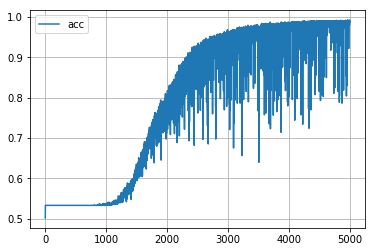

In [26]:
df = pd.DataFrame()
df['acc'] = training_accuracy

df.plot(grid=True)

In [27]:
'''
Remember that we did one hot encoding to represent the 4 classes into binary representation. 
Here we decode those into FIZZ, BUZZ, FIZZBUZZ AND OTHER.
'''

def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

# Testing the Model [Software 2.0]

In [29]:
wrong   = 0
right   = 0

predictedTestLabelList = []

for i,j in zip(processedTestingLabel,predictedTestLabel):
    predictedTestLabelList.append(decodeLabel(j))
    
    if np.argmax(i) == j:
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testingData['input'].tolist()
testDataLabel = testingData['label'].tolist()

testDataInput.insert(0, "UBID")                     #ROW NUMBER 0
testDataLabel.insert(0, "Mayank kulshrestha")

testDataInput.insert(1, "personNumber")             #ROW NUMBER 1
testDataLabel.insert(1, "50291406")

predictedTestLabelList.insert(0, "")
predictedTestLabelList.insert(1, "")

output = {}
output["input"] = testDataInput             #OUTPUT IS A DATAFRAME WITH 3 COLUMNS INPUT, LABELS AND PREDICTED_LABEL. 
output["label"] = testDataLabel             # WE ASSIGN ALL THE TEST DATA INPUT TO ITS INPUT COLUMN AND 
                                            #THE EXPECTED LABEL TO THE LABEL COLUMNS

output["predicted_label"] = predictedTestLabelList   #PREDICTED LABEL COLUMN CONTAINS WHAT OUR MODEL PREDICTED FOR EACH INPUT.  

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 9  Correct :91
Testing Accuracy: 91.0
